In [48]:
import pandas as pd
import matplotlib.pyplot as plt

In [49]:
df = pd.read_csv('filmes.csv', sep= ',') 


In [50]:
df_filmes = df.drop(['id', 'link','duration','rating_mpa','budget','gross_world_wide','gross_us_canada','gross_opening_weekend','director','writer','star','filming_location','production_company','language','win','nomination','oscar'], axis=1)
df_filmes

,title,year,rating_imdb,vote,genre,country_origin
0,Strip Nude for Your Killer,1975,5.6,33000.0,"Erotic Thriller, Giallo, Slasher Horror, Horro...",Italy
1,Carry on Behind,1975,5.6,31000.0,"Parody, Slapstick, Comedy",United Kingdom
2,"So Young, So Lovely, So Vicious...",1975,4.9,487.0,"Drama, Mystery, Thriller",Italy
3,Mahogany,1975,6.1,23000.0,"Drama, Romance",United States
4,Foreplay,1975,4.0,185.0,"Parody, Satire, Sketch Comedy, Comedy",United States
...,...,...,...,...,...,...
33595,Kansas,1988,5.5,14000.0,"Crime, Drama, Romance, Thriller",United States
33596,The Decline of Western Civilization Part II: T...,1988,7.2,45000.0,"Documentary, Music",United States
33597,Man Behind the Sun,1988,6.1,76000.0,"Drama, History, Horror, War",Hong Kong
33598,Yesterday,1988,8.9,36000.0,Drama,Bulgaria


In [51]:
#df_filmes['genre'].str.split(',').str.len().sort_values(ascending= False)
df_filmes[['Genero1', 'Genero2','Genero3','Genero4','Genero5','Genero6','Genero7','Genero8','Genero9','Genero10']] = df_filmes['genre'].str.split(',', expand=True)



In [52]:
# media de notas por genero primario
media_genero_primario = df_filmes.groupby('Genero1')['rating_imdb'].mean().reset_index()
media_genero_primario = media_genero_primario.sort_values(by= 'rating_imdb').tail(10)
media_genero_primario


,Genero1,rating_imdb
172,Western Epic,7.433333
28,Concert,7.442500
49,Epic,7.457143
88,Military Documentary,7.463158
94,Music Documentary,7.518421
97,Nature Documentary,7.520000
82,Korean Drama,7.550000
35,Crime Documentary,7.562963
163,Travel Documentary,7.600000
73,History Documentary,7.842105


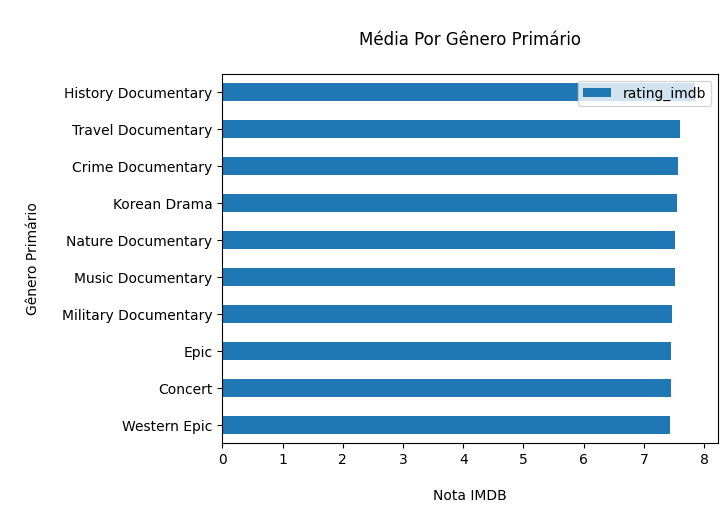

In [53]:
media_genero_primario.plot(kind='barh', x= 'Genero1', y= 'rating_imdb')
plt.ylabel('\nGênero Primário\n') 
plt.xlabel('\nNota IMDB\n')
plt.title('\nMédia Por Gênero Primário\n')
plt.show()

In [54]:
# filme com maior nota, seguindo como criterio desempate a maior quantidade de votos
filme_maior = df_filmes.sort_values(by= 'rating_imdb', ascending= False).head(2)
filme_maior

,title,year,rating_imdb,vote,genre,country_origin,Genero1,Genero2,Genero3,Genero4,Genero5,Genero6,Genero7,Genero8,Genero9,Genero10
11166,Day by Day: The Dynasty,2023,9.6,9.0,Documentary,United States,Documentary,None,None,None,None,None,None,None,None,None
20986,Love Goes Public,2019,9.6,15.0,Documentary,United States,Documentary,None,None,None,None,None,None,None,None,None


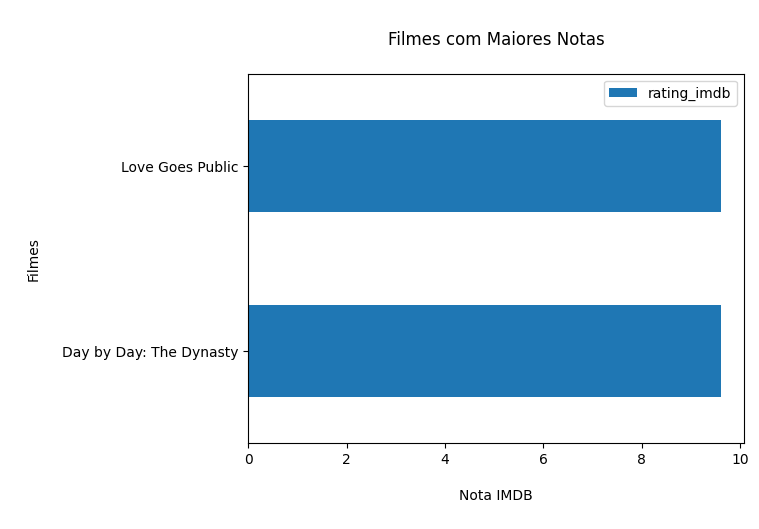

In [55]:
filme_maior.plot(kind='barh', x= 'title', y= 'rating_imdb')
plt.ylabel('\nFilmes\n') 
plt.xlabel('\nNota IMDB\n')
plt.title('\nFilmes com Maiores Notas\n')
plt.show()

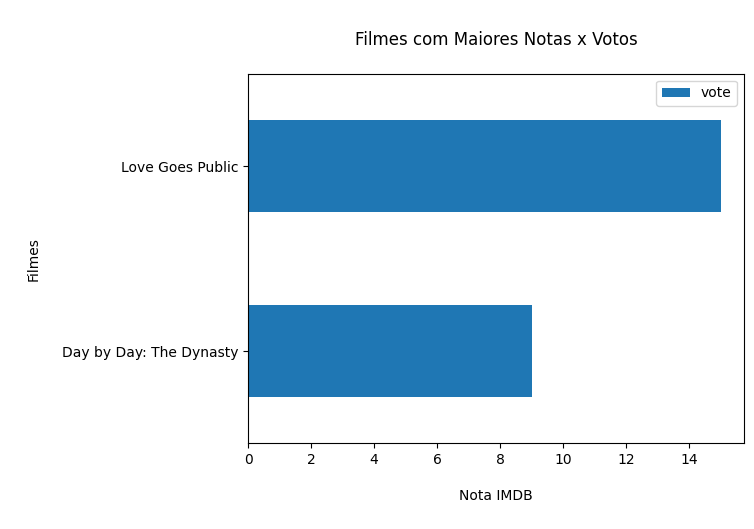

In [56]:
filme_maior.plot(kind='barh', x= 'title', y= 'vote')
plt.ylabel('\nFilmes\n') 
plt.xlabel('\nNota IMDB\n')
plt.title('\nFilmes com Maiores Notas x Votos\n')
plt.show()

In [57]:
# Filme com maior número de votos
maior_votos = df_filmes.groupby(['title','year'])['vote'].max().reset_index()
maior_votos = maior_votos.sort_values(by= 'vote', ascending= False).head(5)
maior_votos


,title,year,vote
12308,Inception,2010,26000000.0
8779,Fight Club,1999,24000000.0
9230,Forrest Gump,1994,23000000.0
19795,Pulp Fiction,1994,23000000.0
12458,Interstellar,2014,22000000.0


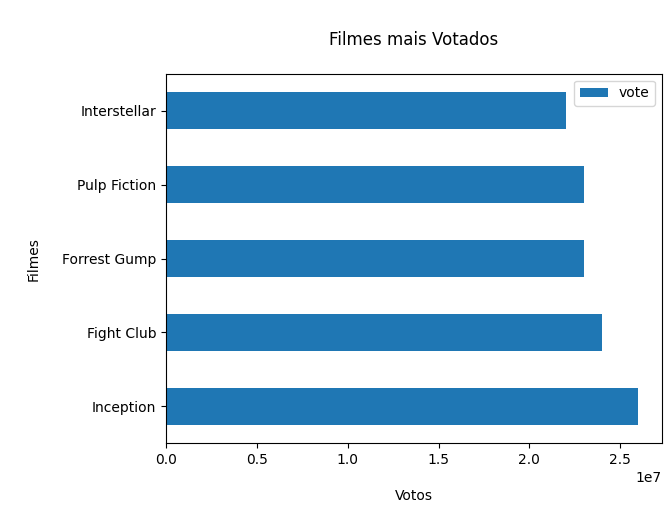

In [74]:
maior_votos.plot(kind='barh', x= 'title', y= 'vote')
plt.ylabel('\nFilmes\n') 
plt.xlabel('\nVotos\n')
plt.title('\nFilmes mais Votados\n')
plt.show()

In [64]:
# País com mais filmes
mais_filmes = (df_filmes['country_origin'].value_counts()).reset_index() #value_counts foi usado para contar quantas vezes o pais aparecia na coluna
mais_filmes = mais_filmes.head(5)
mais_filmes

,country_origin,count
0,United States,13098
1,United Kingdom,1595
2,India,1550
3,Italy,1094
4,Japan,947


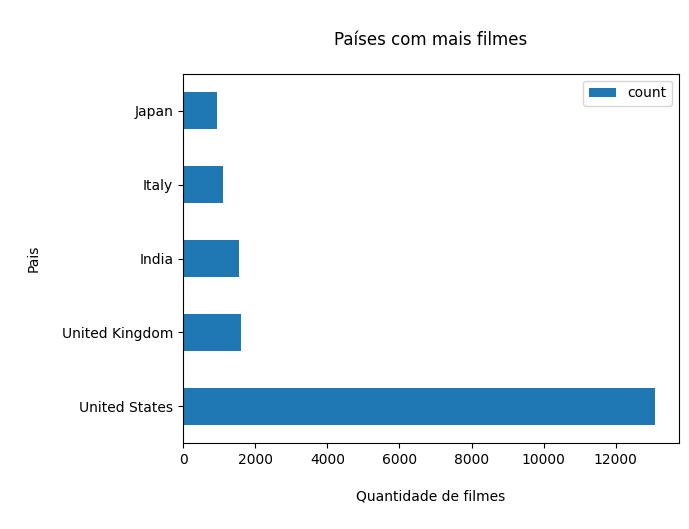

In [68]:
mais_filmes.plot(kind='barh', x= 'country_origin', y= 'count')
plt.ylabel('\nPais\n') 
plt.xlabel('\nQuantidade de filmes\n')
plt.title('\nPaíses com mais filmes\n')
plt.show()

In [66]:
# Gênero mais frequente
gen_frequente = (df_filmes['genre'].value_counts()).reset_index() #value_counts foi usado para contar quantas vezes o pais aparecia na coluna
gen_frequente = gen_frequente.head(5)
gen_frequente

,genre,count
0,Drama,2928
1,Comedy,1506
2,"Drama, Romance",1091
3,Documentary,1009
4,"Comedy, Drama",915


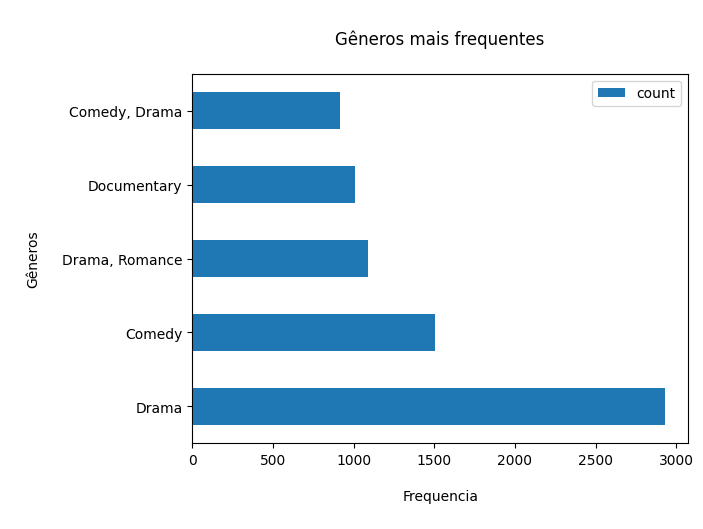

In [71]:
gen_frequente.plot(kind='barh', x= 'genre', y= 'count')
plt.ylabel('\nGêneros\n') 
plt.xlabel('\nFrequencia\n')
plt.title('\nGêneros mais frequentes\n')
plt.show()

In [70]:
# 10 paises com mais filmes no dataset
desafio = (df_filmes['country_origin'].value_counts()).reset_index() #value_counts foi usado para contar quantas vezes o pais aparecia na coluna
gen_frequente = gen_frequente.head(5)
desafio = desafio.head(10)
desafio

,country_origin,count
0,United States,13098
1,United Kingdom,1595
2,India,1550
3,Italy,1094
4,Japan,947
5,France,923
6,"United Kingdom, United States",691
7,Canada,486
8,Hong Kong,352
9,Mexico,346


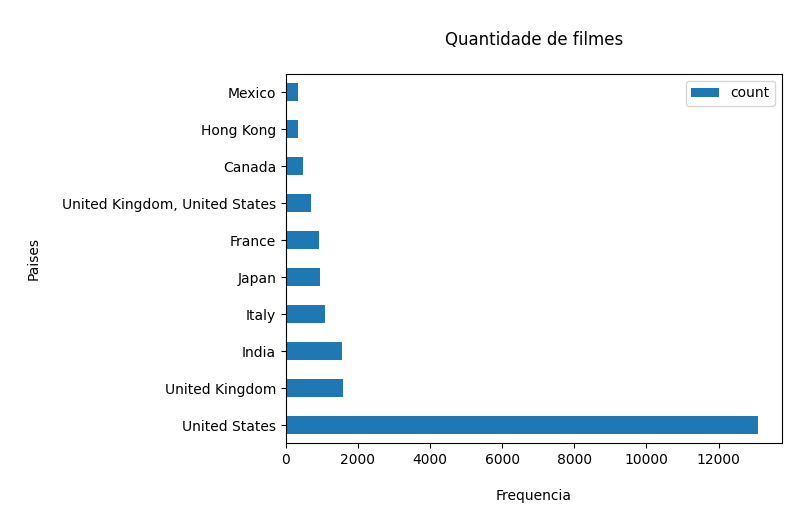

In [73]:
desafio.plot(kind='barh', x= 'country_origin', y= 'count')
plt.ylabel('\nPaises\n') 
plt.xlabel('\nFrequencia\n')
plt.title('\nQuantidade de filmes\n')
plt.show()